In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '443f4a1e-41aa-4a52-8b7a-ebf87eeafca8',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-07-02T06:34:12.700Z', 'error_code': 0, 'error_message': None, 'elapsed': 18, 'credit_count': 1, 'notice': None, 'total_count': 10309}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10261, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [3]:
type(data)

dict

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now', utc=True)
df


id          name symbol          slug  num_market_pairs  \
0       1       Bitcoin    BTC       bitcoin             10261   
1    1027      Ethereum    ETH      ethereum              7047   
2     825        Tether   USDT        tether             56067   
3    1839           BNB    BNB           bnb              1473   
4    3408      USD Coin   USDC      usd-coin             13161   
5      52           XRP    XRP           xrp               970   
6    2010       Cardano    ADA       cardano               846   
7      74      Dogecoin   DOGE      dogecoin               732   
8       2      Litecoin    LTC      litecoin               930   
9    5426        Solana    SOL        solana               476   
10   1958          TRON    TRX          tron               774   
11   6636      Polkadot    DOT  polkadot-new               519   
12   3890       Polygon  MATIC       polygon               754   
13   1831  Bitcoin Cash    BCH  bitcoin-cash               710   
14  11419       Toncoin    TON       toncoin               115   

                  date_added  \
0   2010-07-13T00:00:00.000Z   
1   2015-08-07T00:00:00.000Z   
2   2015-02-25T00:00:00.000Z   
3   2017-07-25T00:00:00.000Z   
4   2018-10-08T00:00:00.000Z   
5   2013-08-04T00:00:00.000Z   
6   2017-10-01T00:00:00.000Z   
7   2013-12-15T00:00:00.000Z   
8   2013-04-28T00:00:00.000Z   
9   2020-04-10T00:00:00.000Z   
10  2017-09-13T00:00:00.000Z   
11  2020-08-19T00:00:00.000Z   
12  2019-04-28T00:00:00.000Z   
13  2017-07-23T00:00:00.000Z   
14  2021-08-26T13:40:22.000Z   

                                                 tags    max_supply  \
0   [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1   [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2   [payments, stablecoin, asset-backed-stablecoin...           NaN   
3   [marketplace, centralized-exchange, payments, ...           NaN   
4   [medium-of-exchange, stablecoin, asset-backed-...           NaN   
5   [medium-of-exchange, enterprise-solutions, arr...  1.000000e+11   
6   [dpos, pos, platform, research, smart-contract...  4.500000e+10   
7   [mineable, pow, scrypt, medium-of-exchange, me...           NaN   
8         [mineable, pow, scrypt, medium-of-exchange]  8.400000e+07   
9   [pos, platform, solana-ecosystem, cms-holdings...           NaN   
10  [media, payments, tron-ecosystem, sec-security...           NaN   
11  [substrate, polkadot, binance-chain, polkadot-...           NaN   
12  [pos, platform, enterprise-solutions, zero-kno...  1.000000e+10   
13  [mineable, pow, sha-256, marketplace, medium-o...  2.100000e+07   
14                                              [pos]           NaN   

    circulating_supply  total_supply  infinite_supply  platform  cmc_rank  \
0         1.941753e+07  1.941753e+07            False       NaN         1   
1         1.202188e+08  1.202188e+08             True       NaN         2   
2         8.334171e+10  8.573353e+10             True       NaN         3   
3         1.558511e+08  1.558511e+08            False       NaN         4   
4         2.739582e+10  2.739582e+10            False       NaN         5   
5         5.225429e+10  9.998866e+10            False       NaN         6   
6         3.494696e+10  3.593697e+10            False       NaN         7   
7         1.400036e+11  1.400036e+11             True       NaN         8   
8         7.327151e+07  8.400000e+07            False       NaN         9   
9         4.007645e+08  5.513668e+08             True       NaN        10   
10        8.991499e+10  8.991501e+10             True       NaN        11   
11        1.200648e+09  1.330126e+09             True       NaN        12   
12        9.319469e+09  1.000000e+10            False       NaN        13   
13        1.943737e+07  1.943737e+07            False       NaN        14   
14        3.431892e+09  5.047559e+09             True       NaN        15   

    self_reported_circulating_supply  self_reported_market_cap tvl_

In [4]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '443f4a1e-41aa-4a52-8b7a-ebf87eeafca8',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now', utc=True)
    df

  
    if not os.path.isfile(r'C:\Users\chcav\Documents\PandasTutorial\API.csv'):
        df.to_csv(r'C:\Users\chcav\Documents\PandasTutorial\API.csv', header='column_names')
    
    else:
        df.to_csv(r'C:\Users\chcav\Documents\PandasTutorial\API.csv', mode='a', header=False)
        
    
    #Then to read in the file: 
    
    df = pd.read_csv(r'C:\Users\chcav\Documents\PandasTutorial\API.csv')


In [ ]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed


In [8]:
df

Unnamed: 0     id             name symbol             slug  \
0              0      1          Bitcoin    BTC          bitcoin   
1              1   1027         Ethereum    ETH         ethereum   
2              2    825           Tether   USDT           tether   
3              3   1839              BNB    BNB              bnb   
4              4   3408         USD Coin   USDC         usd-coin   
5              5     52              XRP    XRP              xrp   
6              6   2010          Cardano    ADA          cardano   
7              7     74         Dogecoin   DOGE         dogecoin   
8              8   5426           Solana    SOL           solana   
9              9   1958             TRON    TRX             tron   
10            10      2         Litecoin    LTC         litecoin   
11            11   6636         Polkadot    DOT     polkadot-new   
12            12   3890          Polygon  MATIC          polygon   
13            13   1831     Bitcoin Cash    BCH     bitcoin-cash   
14            14   3717  Wrapped Bitcoin   WBTC  wrapped-bitcoin   
15             0      1          Bitcoin    BTC          bitcoin   
16             1   1027         Ethereum    ETH         ethereum   
17             2    825           Tether   USDT           tether   
18             3   1839              BNB    BNB              bnb   
19             4   3408         USD Coin   USDC         usd-coin   
20             5     52              XRP    XRP              xrp   
21             6   2010          Cardano    ADA          cardano   
22             7     74         Dogecoin   DOGE         dogecoin   
23             8   5426           Solana    SOL           solana   
24             9   1958             TRON    TRX             tron   
25            10      2         Litecoin    LTC         litecoin   
26            11   6636         Polkadot    DOT     polkadot-new   
27            12   3890          Polygon  MATIC          polygon   
28            13   1831     Bitcoin Cash    BCH     bitcoin-cash   
29            14   3717  Wrapped Bitcoin   WBTC  wrapped-bitcoin   
30             0      1          Bitcoin    BTC          bitcoin   
31             1   1027         Ethereum    ETH         ethereum   
32             2    825           Tether   USDT           tether   
33             3   1839              BNB    BNB              bnb   
34             4   3408         USD Coin   USDC         usd-coin   
35             5     52              XRP    XRP              xrp   
36             6   2010          Cardano    ADA          cardano   
37             7     74         Dogecoin   DOGE         dogecoin   
38             8      2         Litecoin    LTC         litecoin   
39             9   5426           Solana    SOL           solana   
40            10   1958             TRON    TRX             tron   
41            11   6636         Polkadot    DOT     polkadot-new   
42            12   3890          Polygon  MATIC          polygon   
43            13   1831     Bitcoin Cash    BCH     bitcoin-cash   
44            14  11419          Toncoin    TON          toncoin   
45             0      1          Bitcoin    BTC          bitcoin   
46             1   1027         Ethereum    ETH         ethereum   
47             2    825           Tether   USDT           tether   
48             3   1839              BNB    BNB              bnb   
49             4   3408         USD Coin   USDC         usd-coin   
50             5     52              XRP    XRP              xrp   
51             6   2010          Cardano    ADA          cardano   
52             7     74         Dogecoin   DOGE         dogecoin   
53             8      2         Litecoin    LTC         litecoin   
54             9   5426           Solana    SOL           solana   
55            10   1958             TRON    TRX             tron   
56            11   6636         Polkadot    DOT     polkadot-new   
57            12   3890          Polygon  MATIC          polyg

In [9]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df

Unnamed: 0     id             name symbol             slug  \
0              0      1          Bitcoin    BTC          bitcoin   
1              1   1027         Ethereum    ETH         ethereum   
2              2    825           Tether   USDT           tether   
3              3   1839              BNB    BNB              bnb   
4              4   3408         USD Coin   USDC         usd-coin   
5              5     52              XRP    XRP              xrp   
6              6   2010          Cardano    ADA          cardano   
7              7     74         Dogecoin   DOGE         dogecoin   
8              8   5426           Solana    SOL           solana   
9              9   1958             TRON    TRX             tron   
10            10      2         Litecoin    LTC         litecoin   
11            11   6636         Polkadot    DOT     polkadot-new   
12            12   3890          Polygon  MATIC          polygon   
13            13   1831     Bitcoin Cash    BCH     bitcoin-cash   
14            14   3717  Wrapped Bitcoin   WBTC  wrapped-bitcoin   
15             0      1          Bitcoin    BTC          bitcoin   
16             1   1027         Ethereum    ETH         ethereum   
17             2    825           Tether   USDT           tether   
18             3   1839              BNB    BNB              bnb   
19             4   3408         USD Coin   USDC         usd-coin   
20             5     52              XRP    XRP              xrp   
21             6   2010          Cardano    ADA          cardano   
22             7     74         Dogecoin   DOGE         dogecoin   
23             8   5426           Solana    SOL           solana   
24             9   1958             TRON    TRX             tron   
25            10      2         Litecoin    LTC         litecoin   
26            11   6636         Polkadot    DOT     polkadot-new   
27            12   3890          Polygon  MATIC          polygon   
28            13   1831     Bitcoin Cash    BCH     bitcoin-cash   
29            14   3717  Wrapped Bitcoin   WBTC  wrapped-bitcoin   
30             0      1          Bitcoin    BTC          bitcoin   
31             1   1027         Ethereum    ETH         ethereum   
32             2    825           Tether   USDT           tether   
33             3   1839              BNB    BNB              bnb   
34             4   3408         USD Coin   USDC         usd-coin   
35             5     52              XRP    XRP              xrp   
36             6   2010          Cardano    ADA          cardano   
37             7     74         Dogecoin   DOGE         dogecoin   
38             8      2         Litecoin    LTC         litecoin   
39             9   5426           Solana    SOL           solana   
40            10   1958             TRON    TRX             tron   
41            11   6636         Polkadot    DOT     polkadot-new   
42            12   3890          Polygon  MATIC          polygon   
43            13   1831     Bitcoin Cash    BCH     bitcoin-cash   
44            14  11419          Toncoin    TON          toncoin   
45             0      1          Bitcoin    BTC          bitcoin   
46             1   1027         Ethereum    ETH         ethereum   
47             2    825           Tether   USDT           tether   
48             3   1839              BNB    BNB              bnb   
49             4   3408         USD Coin   USDC         usd-coin   
50             5     52              XRP    XRP              xrp   
51             6   2010          Cardano    ADA          cardano   
52             7     74         Dogecoin   DOGE         dogecoin   
53             8      2         Litecoin    LTC         litecoin   
54             9   5426           Solana    SOL           solana   
55            10   1958             TRON    TRX             tron   
56            11   6636         Polkadot    DOT     polkadot-new   
57            12   3890          Polygon  MATIC          polyg

In [11]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
name                                                                         
Bitcoin                             -0.00294                       0.40322   
Ethereum                            -0.01461                      -0.05009   
Tether                               0.00342                       0.02234   
BNB                                  0.21842                       1.49621   
USD Coin                             0.00405                       0.00406   
XRP                                 -0.83314                       3.51743   
Cardano                             -0.08762                       1.99519   
Dogecoin                             0.08799                      -2.42030   
Solana                               1.08625                       5.93556   
TRON                                -0.56554                      -0.68590   
Litecoin                             1.98835                       2.90067   
Polkadot                             0.08281                       1.91307   
Polygon                              0.27817                       2.05015   
Bitcoin Cash                        -0.00436                      -3.78101   
Wrapped Bitcoin                      0.11900                       1.20429   
Toncoin                             -0.10344                       2.61573   

                 quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
name                                                                         
Bitcoin                             -1.18164                      12.50376   
Ethereum                             0.13353                       1.20940   
Tether                              -0.03343                      -0.01659   
BNB                                  2.20477                     -20.61881   
USD Coin                             0.01622                       0.00857   
XRP                                 -1.17474                      -6.45026   
Cardano                             -2.41974                     -22.37057   
Dogecoin                            -0.89381                      -7.03963   
Solana                              11.80297                      -9.26846   
TRON                                 3.84792                      -0.67365   
Litecoin                            21.15946                      14.34206   
Polkadot                             2.64862                      -0.35216   
Polygon                             -0.68529                     -26.31085   
Bitcoin Cash                        33.55878                     138.34345   
Wrapped Bitcoin                      1.17899                       9.18505   
Toncoin                             -1.52048                     -21.77503   

                 quote.USD.percent_change_60d  quote.USD.percent_change_90d  
name                                                                         
Bitcoin                               6.95371                      10.13071  
Ethereum                              2.65054                       7.54907  
Tether                               -0.03325                       0.00431  
BNB                                 -24.48318                     -21.09507  
USD Coin                              0.01953                       0.05374  
XRP                                   5.39987                      -5.17128  
Cardano                             -25.15219                     -24.04739  
Dogecoin                            -14.47478                     -13.65156  
Solana                              -12.90144                      -5.08430  
TRON                                  9.45981                      15.91753  
Litecoin                             23.92154                      19.55962  
Polkadot                             -7.38880                     -14.93202  
Polygon                             -31.35778                     -38.42993  
Bitcoin Cash                        1

In [12]:
df4 = df3.stack()
df4

name                                         
Bitcoin          quote.USD.percent_change_1h     -0.00294
                 quote.USD.percent_change_24h     0.40322
                 quote.USD.percent_change_7d     -1.18164
                 quote.USD.percent_change_30d    12.50376
                 quote.USD.percent_change_60d     6.95371
                 quote.USD.percent_change_90d    10.13071
Ethereum         quote.USD.percent_change_1h     -0.01461
                 quote.USD.percent_change_24h    -0.05009
                 quote.USD.percent_change_7d      0.13353
                 quote.USD.percent_change_30d     1.20940
                 quote.USD.percent_change_60d     2.65054
                 quote.USD.percent_change_90d     7.54907
Tether           quote.USD.percent_change_1h      0.00342
                 quote.USD.percent_change_24h     0.02234
                 quote.USD.percent_change_7d     -0.03343
                 quote.USD.percent_change_30d    -0.01659
                 quote.USD

In [13]:
type(df4)

pandas.core.series.Series

In [14]:
df5 = df4.to_frame(name='values')
df5

values
name                                                  
Bitcoin         quote.USD.percent_change_1h   -0.00294
                quote.USD.percent_change_24h   0.40322
                quote.USD.percent_change_7d   -1.18164
                quote.USD.percent_change_30d  12.50376
                quote.USD.percent_change_60d   6.95371
                quote.USD.percent_change_90d  10.13071
Ethereum        quote.USD.percent_change_1h   -0.01461
                quote.USD.percent_change_24h  -0.05009
                quote.USD.percent_change_7d    0.13353
                quote.USD.percent_change_30d   1.20940
                quote.USD.percent_change_60d   2.65054
                quote.USD.percent_change_90d   7.54907
Tether          quote.USD.percent_change_1h    0.00342
                quote.USD.percent_change_24h   0.02234
                quote.USD.percent_change_7d   -0.03343
                quote.USD.percent_change_30d  -0.01659
                quote.USD.percent_change_60d  -0.03325
                quote.USD.percent_change_90d   0.00431
BNB             quote.USD.percent_change_1h    0.21842
                quote.USD.percent_change_24h   1.49621
                quote.USD.percent_change_7d    2.20477
                quote.USD.percent_change_30d -20.61881
                quote.USD.percent_change_60d -24.48318
                quote.USD.percent_change_90d -21.09507
USD Coin        quote.USD.percent_change_1h    0.00405
                quote.USD.percent_change_24h   0.00406
                quote.USD.percent_change_7d    0.01622
                quote.USD.percent_change_30d   0.00857
                quote.USD.percent_change_60d   0.01953
                quote.USD.percent_change_90d   0.05374
XRP             quote.USD.percent_change_1h   -0.83314
                quote.USD.percent_change_24h   3.51743
                quote.USD.percent_change_7d   -1.17474
                quote.USD.percent_change_30d  -6.45026
                quote.USD.percent_change_60d   5.39987
                quote.USD.percent_change_90d  -5.17128
Cardano         quote.USD.percent_change_1h   -0.08762
                quote.USD.percent_change_24h   1.99519
                quote.USD.percent_change_7d   -2.41974
                quote.USD.percent_change_30d -22.37057
                quote.USD.percent_change_60d -25.15219
                quote.USD.percent_change_90d -24.04739
Dogecoin        quote.USD.percent_change_1h    0.08799
                quote.USD.percent_change_24h  -2.42030
                quote.USD.percent_change_7d   -0.89381
                quote.USD.percent_change_30d  -7.03963
                quote.USD.percent_change_60d -14.47478
                quote.USD.percent_change_90d -13.65156
Solana          quote.USD.percent_change_1h    1.08625
                quote.USD.percent_change_24h   5.93556
                quote.USD.percent_change_7d   11.80297
                quote.USD.percent_change_30d  -9.26846
                quote.USD.percent_change_60d -12.90144
                quote.USD.percent_change_90d  -5.08430
TRON            quote.USD.percent_change_1h   -0.56554
                quote.USD.percent_change_24h  -0.68590
                quote.USD.percent_change_7d    3.84792
                quote.USD.percent_change_30d  -0.67365
                quote.USD.percent_change_60d   9.45981
                quote.USD.percent_change_90d  15.91753
Litecoin        quote.USD.percent_change_1h    1.98835
                quote.USD.percent_change_24h   2.90067
                quote.USD.percent_change_7d   21.15946
                quote.USD.percent_change_30d  14.34206
                quote.USD.percent_change_60d  23.92154
                quote.USD.percent_change_90d  19.55962
Polkadot        quote.USD.percent_change_1h    0.08281
                quote.USD.percent_change_24h   1.91307
                quote.USD.percent_change_7d    2.64862
                quote.USD.percent_change_30d  -0.35216
                quote.USD.percent_change_60d  -7.38880
                quote.USD.percent

In [15]:
df5.count()

values    96
dtype: int64

In [ ]:
index = pd.Index(range(96))

In [ ]:
#df6 = df5.set_index(index)
df6 = df5.reset_index()
df6

In [19]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

name                percent_change    values
0           Bitcoin   quote.USD.percent_change_1h  -0.00294
1           Bitcoin  quote.USD.percent_change_24h   0.40322
2           Bitcoin   quote.USD.percent_change_7d  -1.18164
3           Bitcoin  quote.USD.percent_change_30d  12.50376
4           Bitcoin  quote.USD.percent_change_60d   6.95371
5           Bitcoin  quote.USD.percent_change_90d  10.13071
6          Ethereum   quote.USD.percent_change_1h  -0.01461
7          Ethereum  quote.USD.percent_change_24h  -0.05009
8          Ethereum   quote.USD.percent_change_7d   0.13353
9          Ethereum  quote.USD.percent_change_30d   1.20940
10         Ethereum  quote.USD.percent_change_60d   2.65054
11         Ethereum  quote.USD.percent_change_90d   7.54907
12           Tether   quote.USD.percent_change_1h   0.00342
13           Tether  quote.USD.percent_change_24h   0.02234
14           Tether   quote.USD.percent_change_7d  -0.03343
15           Tether  quote.USD.percent_change_30d  -0.01659
16           Tether  quote.USD.percent_change_60d  -0.03325
17           Tether  quote.USD.percent_change_90d   0.00431
18              BNB   quote.USD.percent_change_1h   0.21842
19              BNB  quote.USD.percent_change_24h   1.49621
20              BNB   quote.USD.percent_change_7d   2.20477
21              BNB  quote.USD.percent_change_30d -20.61881
22              BNB  quote.USD.percent_change_60d -24.48318
23              BNB  quote.USD.percent_change_90d -21.09507
24         USD Coin   quote.USD.percent_change_1h   0.00405
25         USD Coin  quote.USD.percent_change_24h   0.00406
26         USD Coin   quote.USD.percent_change_7d   0.01622
27         USD Coin  quote.USD.percent_change_30d   0.00857
28         USD Coin  quote.USD.percent_change_60d   0.01953
29         USD Coin  quote.USD.percent_change_90d   0.05374
30              XRP   quote.USD.percent_change_1h  -0.83314
31              XRP  quote.USD.percent_change_24h   3.51743
32              XRP   quote.USD.percent_change_7d  -1.17474
33              XRP  quote.USD.percent_change_30d  -6.45026
34              XRP  quote.USD.percent_change_60d   5.39987
35              XRP  quote.USD.percent_change_90d  -5.17128
36          Cardano   quote.USD.percent_change_1h  -0.08762
37          Cardano  quote.USD.percent_change_24h   1.99519
38          Cardano   quote.USD.percent_change_7d  -2.41974
39          Cardano  quote.USD.percent_change_30d -22.37057
40          Cardano  quote.USD.percent_change_60d -25.15219
41          Cardano  quote.USD.percent_change_90d -24.04739
42         Dogecoin   quote.USD.percent_change_1h   0.08799
43         Dogecoin  quote.USD.percent_change_24h  -2.42030
44         Dogecoin   quote.USD.percent_change_7d  -0.89381
45         Dogecoin  quote.USD.percent_change_30d  -7.03963
46         Dogecoin  quote.USD.percent_change_60d -14.47478
47         Dogecoin  quote.USD.percent_change_90d -13.65156
48           Solana   quote.USD.percent_change_1h   1.08625
49           Solana  quote.USD.percent_change_24h   5.93556
50           Solana   quote.USD.percent_change_7d  11.80297
51           Solana  quote.USD.percent_change_30d  -9.26846
52           Solana  quote.USD.percent_change_60d -12.90144
53           Solana  quote.USD.percent_change_90d  -5.08430
54             TRON   quote.USD.percent_change_1h  -0.56554
55             TRON  quote.USD.percent_change_24h  -0.68590
56             TRON   quote.USD.percent_change_7d   3.84792
57             TRON  quote.USD.percent_change_30d  -0.67365
58             TRON  quote.USD.percent_change_60d   9.45981
59             TRON  quote.USD.percent_change_90d  15.91753
60         Litecoin   quote.USD.percent_change_1h   1.98835
61         Litecoin  quote.USD.percent_change_24h   2.90067
62         Litecoin   quote.USD.percent_change_7d  21.15946
63         Litecoin  quote.USD.percent_change_30d  14.34206
64         Litecoin  quote.USD.percent_change_60d  23.92154
65         Litecoin  quote.USD.percent_change_90d  19.5

In [20]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h' ,'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

name percent_change    values
0           Bitcoin             1h  -0.00294
1           Bitcoin            24h   0.40322
2           Bitcoin             7d  -1.18164
3           Bitcoin            30d  12.50376
4           Bitcoin            60d   6.95371
5           Bitcoin            90d  10.13071
6          Ethereum             1h  -0.01461
7          Ethereum            24h  -0.05009
8          Ethereum             7d   0.13353
9          Ethereum            30d   1.20940
10         Ethereum            60d   2.65054
11         Ethereum            90d   7.54907
12           Tether             1h   0.00342
13           Tether            24h   0.02234
14           Tether             7d  -0.03343
15           Tether            30d  -0.01659
16           Tether            60d  -0.03325
17           Tether            90d   0.00431
18              BNB             1h   0.21842
19              BNB            24h   1.49621
20              BNB             7d   2.20477
21              BNB            30d -20.61881
22              BNB            60d -24.48318
23              BNB            90d -21.09507
24         USD Coin             1h   0.00405
25         USD Coin            24h   0.00406
26         USD Coin             7d   0.01622
27         USD Coin            30d   0.00857
28         USD Coin            60d   0.01953
29         USD Coin            90d   0.05374
30              XRP             1h  -0.83314
31              XRP            24h   3.51743
32              XRP             7d  -1.17474
33              XRP            30d  -6.45026
34              XRP            60d   5.39987
35              XRP            90d  -5.17128
36          Cardano             1h  -0.08762
37          Cardano            24h   1.99519
38          Cardano             7d  -2.41974
39          Cardano            30d -22.37057
40          Cardano            60d -25.15219
41          Cardano            90d -24.04739
42         Dogecoin             1h   0.08799
43         Dogecoin            24h  -2.42030
44         Dogecoin             7d  -0.89381
45         Dogecoin            30d  -7.03963
46         Dogecoin            60d -14.47478
47         Dogecoin            90d -13.65156
48           Solana             1h   1.08625
49           Solana            24h   5.93556
50           Solana             7d  11.80297
51           Solana            30d  -9.26846
52           Solana            60d -12.90144
53           Solana            90d  -5.08430
54             TRON             1h  -0.56554
55             TRON            24h  -0.68590
56             TRON             7d   3.84792
57             TRON            30d  -0.67365
58             TRON            60d   9.45981
59             TRON            90d  15.91753
60         Litecoin             1h   1.98835
61         Litecoin            24h   2.90067
62         Litecoin             7d  21.15946
63         Litecoin            30d  14.34206
64         Litecoin            60d  23.92154
65         Litecoin            90d  19.55962
66         Polkadot             1h   0.08281
67         Polkadot            24h   1.91307
68         Polkadot             7d   2.64862
69         Polkadot            30d  -0.35216
70         Polkadot            60d  -7.38880
71         Polkadot            90d -14.93202
72          Polygon             1h   0.27817
73          Polygon            24h   2.05015
74          Polygon             7d  -0.68529
75          Polygon            30d -26.31085
76          Polygon            60d -31.35778
77          Polygon            90d -38.42993
78     Bitcoin Cash             1h  -0.00436
79     Bitcoin Cash            24h  -3.78101
80     Bitcoin Cash             7d  33.55878
81     Bitcoin Cash            30d 138.34345
82     Bitcoin Cash            60d 130.29783
83     Bitcoin Cash            90d 120.72801
84  Wrapped Bitcoin             1h   0.11900
85  Wrapped Bitcoin            24h   1.20429
86  Wrapped Bitcoin             7d   1.17899
87  Wrapped Bitcoin            30d   9.18505
88  Wrappe

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

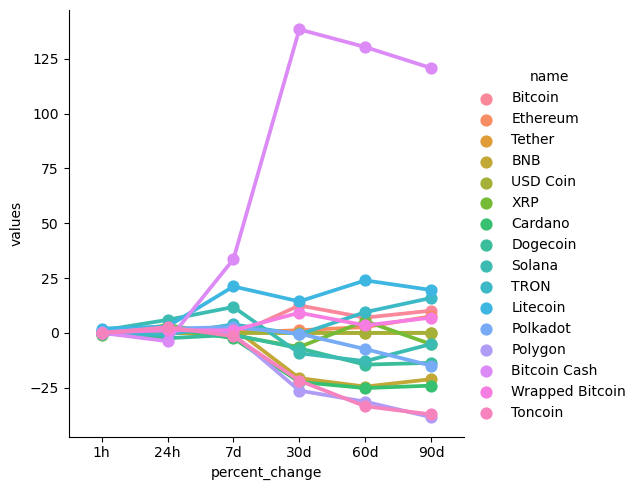

In [22]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [23]:
df10 = df[['name','quote.USD.price','timestamp']]
df10

name  quote.USD.price                         timestamp
0             Bitcoin      30424.95478  2023-06-29 21:34:50.719909+00:00
1            Ethereum       1851.59651  2023-06-29 21:34:50.719909+00:00
2              Tether          0.99990  2023-06-29 21:34:50.719909+00:00
3                 BNB        233.27587  2023-06-29 21:34:50.719909+00:00
4            USD Coin          1.00001  2023-06-29 21:34:50.719909+00:00
5                 XRP          0.47540  2023-06-29 21:34:50.719909+00:00
6             Cardano          0.27470  2023-06-29 21:34:50.719909+00:00
7            Dogecoin          0.06322  2023-06-29 21:34:50.719909+00:00
8              Solana         17.57802  2023-06-29 21:34:50.719909+00:00
9                TRON          0.07453  2023-06-29 21:34:50.719909+00:00
10           Litecoin         84.73910  2023-06-29 21:34:50.719909+00:00
11           Polkadot          4.94635  2023-06-29 21:34:50.719909+00:00
12            Polygon          0.62434  2023-06-29 21:34:50.719909+00:00
13       Bitcoin Cash        246.53419  2023-06-29 21:34:50.719909+00:00
14    Wrapped Bitcoin      30402.23930  2023-06-29 21:34:50.719909+00:00
15            Bitcoin      30432.27262  2023-06-29 21:35:51.039660+00:00
16           Ethereum       1851.80689  2023-06-29 21:35:51.039660+00:00
17             Tether          0.99991  2023-06-29 21:35:51.039660+00:00
18                BNB        233.31265  2023-06-29 21:35:51.039660+00:00
19           USD Coin          1.00002  2023-06-29 21:35:51.039660+00:00
20                XRP          0.47530  2023-06-29 21:35:51.039660+00:00
21            Cardano          0.27473  2023-06-29 21:35:51.039660+00:00
22           Dogecoin          0.06322  2023-06-29 21:35:51.039660+00:00
23             Solana         17.60526  2023-06-29 21:35:51.039660+00:00
24               TRON          0.07452  2023-06-29 21:35:51.039660+00:00
25           Litecoin         84.76005  2023-06-29 21:35:51.039660+00:00
26           Polkadot          4.94512  2023-06-29 21:35:51.039660+00:00
27            Polygon          0.62481  2023-06-29 21:35:51.039660+00:00
28       Bitcoin Cash        246.73227  2023-06-29 21:35:51.039660+00:00
29    Wrapped Bitcoin      30405.80580  2023-06-29 21:35:51.039660+00:00
30            Bitcoin      30527.89800  2023-07-02 04:33:58.965408+00:00
31           Ethereum       1915.70645  2023-07-02 04:33:58.965408+00:00
32             Tether          1.00003  2023-07-02 04:33:58.965408+00:00
33                BNB        244.26219  2023-07-02 04:33:58.965408+00:00
34           USD Coin          1.00012  2023-07-02 04:33:58.965408+00:00
35                XRP          0.48843  2023-07-02 04:33:58.965408+00:00
36            Cardano          0.29000  2023-07-02 04:33:58.965408+00:00
37           Dogecoin          0.06711  2023-07-02 04:33:58.965408+00:00
38           Litecoin        107.34367  2023-07-02 04:33:58.965408+00:00
39             Solana         19.02824  2023-07-02 04:33:58.965408+00:00
40               TRON          0.07625  2023-07-02 04:33:58.965408+00:00
41           Polkadot          5.27432  2023-07-02 04:33:58.965408+00:00
42            Polygon          0.66508  2023-07-02 04:33:58.965408+00:00
43       Bitcoin Cash        273.53987  2023-07-02 04:33:58.965408+00:00
44            Toncoin          1.40214  2023-07-02 04:33:58.965408+00:00
45            Bitcoin      30527.60740  2023-07-02 04:34:59.484555+00:00
46           Ethereum       1915.61398  2023-07-02 04:34:59.484555+00:00
47             Tether          1.00001  2023-07-02 04:34:59.484555+00:00
48                BNB        244.25325  2023-07-02 04:34:59.484555+00:00
49           USD Coin          1.00009  2023-07-02 04:34:59.484555+00:00
50                XRP          0.48842  2023-07-02 04:34:59.484555+00:00
51            Cardano          0.28997  2023-07-02 04:34:59.484555+00:00
52           Dogecoin          0.06711  2023-07-02 04:34:59.484555+00:00
53           Litecoin        107.31067  2023-07-02 04:34:59.484555+00:00
54

In [24]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

name  quote.USD.price                         timestamp
0     Bitcoin      30424.95478  2023-06-29 21:34:50.719909+00:00
15    Bitcoin      30432.27262  2023-06-29 21:35:51.039660+00:00
30    Bitcoin      30527.89800  2023-07-02 04:33:58.965408+00:00
45    Bitcoin      30527.60740  2023-07-02 04:34:59.484555+00:00
60    Bitcoin      30523.90123  2023-07-02 04:36:00.106384+00:00
75    Bitcoin      30517.47591  2023-07-02 04:37:00.946005+00:00
90    Bitcoin      30517.86988  2023-07-02 04:38:01.574095+00:00
105   Bitcoin      30517.36520  2023-07-02 04:39:02.072890+00:00
120   Bitcoin      30519.36042  2023-07-02 04:40:02.632934+00:00
135   Bitcoin      30515.00518  2023-07-02 04:41:03.248601+00:00
150   Bitcoin      30516.71202  2023-07-02 04:42:04.406330+00:00
165   Bitcoin      30513.54670  2023-07-02 04:43:04.846957+00:00
180   Bitcoin      30513.50325  2023-07-02 04:44:05.522977+00:00
195   Bitcoin      30507.50127  2023-07-02 04:45:06.176779+00:00
210   Bitcoin      30512.54077  2023-07-02 04:46:06.966387+00:00
225   Bitcoin      30508.81634  2023-07-02 04:47:07.384892+00:00
240   Bitcoin      30509.59081  2023-07-02 04:48:08.176695+00:00
255   Bitcoin      30516.62707  2023-07-02 04:49:08.875371+00:00
270   Bitcoin      30514.23760  2023-07-02 04:50:10.951749+00:00
285   Bitcoin      30505.51128  2023-07-02 04:51:11.304312+00:00
300   Bitcoin      30518.68364  2023-07-02 04:52:12.122828+00:00
315   Bitcoin      30513.84227  2023-07-02 04:53:12.604078+00:00
330   Bitcoin      30520.33417  2023-07-02 04:54:13.536465+00:00
345   Bitcoin      30512.88915  2023-07-02 04:55:14.063872+00:00
360   Bitcoin      30519.79165  2023-07-02 04:56:14.630271+00:00
375   Bitcoin      30516.34569  2023-07-02 04:57:15.096504+00:00
390   Bitcoin      30521.48647  2023-07-02 04:58:15.714388+00:00
405   Bitcoin      30528.14096  2023-07-02 04:59:16.366028+00:00
420   Bitcoin      30532.93752  2023-07-02 05:00:18.410240+00:00
435   Bitcoin      30523.96259  2023-07-02 05:01:19.043299+00:00
450   Bitcoin      30531.26171  2023-07-02 05:02:19.553062+00:00
465   Bitcoin      30539.85926  2023-07-02 05:03:20.190651+00:00
480   Bitcoin      30542.70800  2023-07-02 05:04:20.983317+00:00
495   Bitcoin      30546.40511  2023-07-02 05:05:21.562978+00:00
510   Bitcoin      30546.58277  2023-07-02 05:07:08.253025+00:00
525   Bitcoin      30546.07330  2023-07-02 05:08:08.793014+00:00
540   Bitcoin      30547.07165  2023-07-02 05:09:09.252913+00:00
555   Bitcoin      30557.75182  2023-07-02 05:10:09.747659+00:00
570   Bitcoin      30535.41780  2023-07-02 05:11:10.312525+00:00
585   Bitcoin      30528.04349  2023-07-02 05:12:10.970253+00:00
600   Bitcoin      30526.21485  2023-07-02 05:13:11.467344+00:00
615   Bitcoin      30526.97272  2023-07-02 05:14:12.019371+00:00
630   Bitcoin      30525.29611  2023-07-02 05:15:12.524946+00:00
645   Bitcoin      30524.20201  2023-07-02 05:16:13.247059+00:00
660   Bitcoin      30523.56692  2023-07-02 05:20:17.749620+00:00
675   Bitcoin      30514.51232  2023-07-02 05:21:19.985490+00:00
690   Bitcoin      30516.60521  2023-07-02 05:22:20.657134+00:00
705   Bitcoin      30516.61335  2023-07-02 05:23:21.087997+00:00
720   Bitcoin      30516.61335  2023-07-02 05:24:21.713235+00:00
735   Bitcoin      30515.39746  2023-07-02 05:25:22.191256+00:00
750   Bitcoin      30514.85014  2023-07-02 05:26:22.900256+00:00
765   Bitcoin      30513.87908  2023-07-02 05:27:23.572777+00:00
780   Bitcoin      30513.87908  2023-07-02 05:28:24.239193+00:00
795   Bitcoin      30513.78130  2023-07-02 05:29:24.520545+00:00
810   Bitcoin      30499.01397  2023-07-02 05:47:41.384732+00:00
825   Bitcoin      30499.17419  2023-07-02 05:48:41.916408+00:00
840   Bitcoin      30500.48966  2023-07-02 05:49:42.502736+00:00
855   Bitcoin      30499.18502  2023-07-02 05:50:43.432880+00:00
870   Bitcoin      30498.86732  2023-07-02 05:51:44.146693+00:00
885   Bitcoin      30498.01844  2023-07-02 05:59:22.834725+00:00
900   Bitcoin      30497.96437  2023-07-02 0

<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

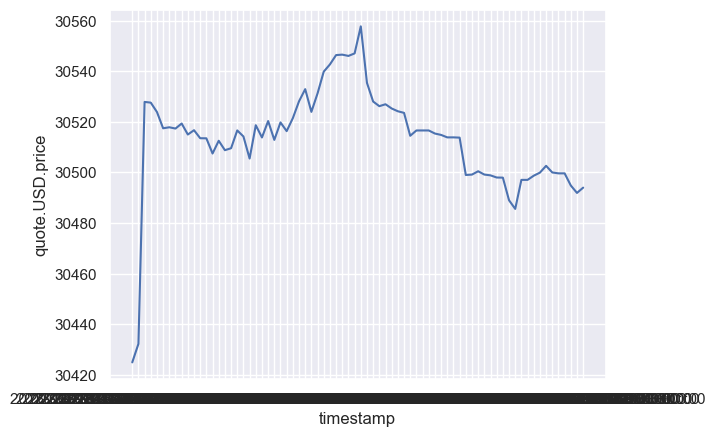

In [25]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)